# Project 1 - Data Engineering
## 2 Data Exploration and Analysis
This notebook is for the implementation of task "2 Data Exploration and Analysis", as listed in the **Project Instructions**.

<div class="alert alert-success">
<b>Overview:</b><br>
Data Exploration and Analysis consists of the following parts worth 70 points:
<ul>
    <li><b>E1 - Obtain and Scrub</b> (15 points)</li>
    <li><b>E2 - Exploratory data analysis (EDA) </b>(20 points)</li>
    <li><b>E3 - Formulate hypotheses </b>(25 points)</li>
    <li><b>Follow the guidelines for Data Exploration and Analysis below </b>(10 points)</li>
</ul></div>

<div class="alert alert-success">
<b>Guidelines for Data Exploration and Analysis:</b><br>
    <ol>
        <li>Use a single Jupyer notebook for your project.</li>
        <li>Use only Python-code for your project.</li>
        <li>The use of automatic and semi-automatic data analyis tools is not allowed (e. g., PandasGUI, D-Tale, Mito, etc.). Only use packages we used in the coded lectures.</li>
        <li>Export your environment for submission as 'prj01-environment.txt'.</li>
        <li>Upload your resulting work as a zip file containing only a single jupyter notebook and required files to run the notebook. All cell outputs and <b>figures must display in jupyter lab</b>. (Test this, in particular when you use another environment like VS Code.)</li>
        <li>All code cells in your notebook must be runnable without errors or warnings (e. g., deprecated functions). Each error/warning subtracts -2 points (up to the full 10 points for following the  guidelines).</li>
        <li>Use only relative paths in your project.</li>
        <li>Avoid (excessive) code duplication.</li>
        <li>Avoid loops iterating over pandas objects (Series, DataFrames). Explicitly justify each exception via a comment. </li>
        <li>All coded steps in your analysis must be commented.</li>
        <li>Keep your code as well as outputs short, precise and readable. Each long or unnecessary output subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
    </ol>
    <b>Late submissions are not accepted and earn you 0 points on the python project. </b>
</div>

Explicitly list which notebook toolset was used (jupyter lab/jupyter notebook/VS Code/etc.) 

**here**: VS Code

Explicitly and clearly state the chosen dataset number and title:
### PKW
##### 10 - Verkehr 2er Set: Pkw-Neuzulassungen nach Marken ab Jänner 2000, PKW mit Elektro-, Hybrid-Antrieb nach Bundesländern Österreich


## E1 - Obtain and Scrub

### Obtain
Download the dataset and understand both: 
- format: wide vs. long, separaters, decimal points, encoding, etc., and 
- content: what variables are in the columns, what is their meaning?
To this end, identify and download metadata such as headers, category listings, explanatory reports, etc.
### Scrub
The aim of scrub is to create a clean version of the data for further analysis. 
- Load the dataset and take care of dtypes (dates, numbers, categories, etc.). Justify why you don't load/use specific columns.
- Check for footnotes or any other notifications on special cell content, such as time series breaks. Follow up that information, and document your decision how to deal with it. Remember: A homework contained such info in the cell "76.1 b". The metadata defines what that "b" stands for.
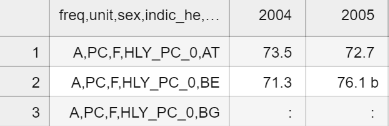
- Choose an appropriate (Multi-)Index.
- Identify:
    1. missing values and get row and column overviews. Use graphical and/or numeric approaches. Once identified, handle missing values according to column type, time series property and data set size.
    2. duplicates (justify the used column subset). Remove duplicates - if any - and inspect what you removed.
- Transform to shape (tidy vs. wide) best suited for further analysis.
- Export the clean data to a file for inspection with an external data browser (e.g., MS Excel).
- Provide an overview of the clean dataset:
    1. show the dtypes
    2. quantitative column descriptions: 
        1. categorical columns: number of unique values, counts 
        2. numeric columns: range and median

In [1]:
# General Definitions and imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Primary Color Palette
primary_color = "#2B2D42"
secondary_color = "#8D99AE"
accent_color = "#EF233C"
background_color = "#EDF2F4"
text_color = "#333333"

# Additional Colors
highlight_color = "#D90429"
info_color = "#3A86FF"
success_color = "#06D6A0"
warning_color = "#FFD166"
error_color = "#FF4B4B"

# Custom Chart Colors
chart_color_1 = "#264653" 
chart_color_2 = "#2A9D8F"
chart_color_3 = "#E9C46A"
chart_color_4 = "#F4A261"
chart_color_5 = "#E76F51" 

# Set the color palette
sns.set_palette(sns.color_palette([primary_color, accent_color]))

# Set the style
sns.set_style("whitegrid")

# Set the context
sns.set_context("notebook")



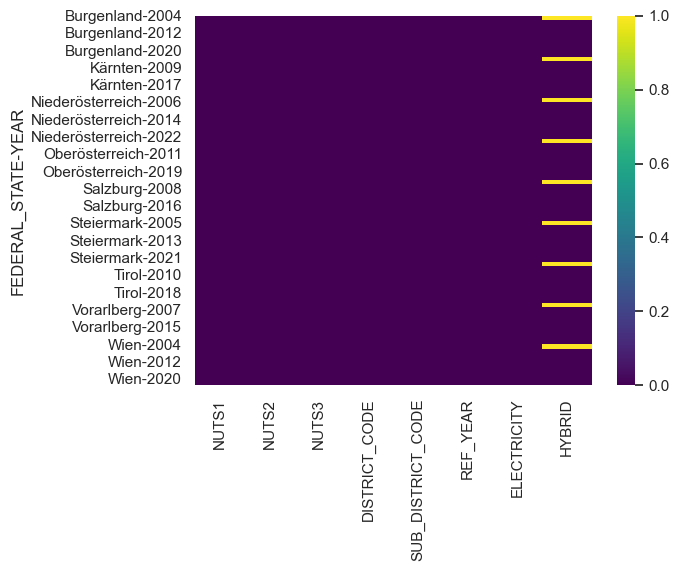

In [2]:
# E1:
df_electro = pd.read_csv('https://www.wien.gv.at/gogv/l9ogdpkwelektrohybrid2022', sep=';', encoding='latin1')
df_electro.set_index(['FEDERAL_STATE', 'YEAR'], inplace=True)


# "1 395,00" -> "1395"
df_electro['ELECTRICITY'] = df_electro['ELECTRICITY'].str.replace(' ', '')
df_electro['ELECTRICITY'] = df_electro['ELECTRICITY'].str.split(',').str[0].astype(int)


# "1 395,00" -> "1395"
df_electro['HYBRID'] = df_electro['HYBRID'].str.replace(' ', '')
df_electro['HYBRID'] = df_electro['HYBRID'].str.split(',').str[0]


sns.heatmap(df_electro.isnull(), cmap='viridis')
#years 2004 and 2005 have no values in Column HYBRID. We assume there have been no hybrid cars in these years, so we fill the values with 0
df_electro.fillna({'HYBRID': 0}, inplace=True)

df_electro['HYBRID'] = df_electro['HYBRID'].astype(int)


# Columns NUTS1, NUTS2, NUTS3, DISTRICT_CODE, SUB_DISTRICT_CODE are redundant with FEDERAL_STATE, so we drop them. REF_YEAR is always 2022, so we drop it as well
df_electro.drop(columns=['NUTS1', 'NUTS2', 'NUTS3', 'DISTRICT_CODE', 'SUB_DISTRICT_CODE', 'REF_YEAR'], inplace=True)


#export
df_electro.to_csv('df_electro.csv')






## E2 - Exploratory data analysis (EDA)
Use the clean dataset and understand and explore the relationships in the data (numerical, visual, statistical). This includes at least but is not limited to:
- A comprehensive textual description of meaning for relevant fields in the dataset
- Statistical/numerical descriptions and visualization techniques we learned in the course inluding correlations, distributions and groupings of variing degrees.
- Checks for data quality, e. g., completeness, plausibility, outliers
- Handling any identified problems with the data
- If necessary, use additional data wrangling in line with your EDA and only keep what's necessary for the following steps of your analysis with appropriate data granularity and form ("tidy data")

Don't:
- test/prove hypotheses here. EDA should only motivate hypotheses. 

Advanced/bonus:
- Depending on your hypothesis you may want to join external data (e.g., merge external highest education level to existing vaccination data) for additional insights.

Explain all steps taken and your thinking why you deem them necessary.

Text(0.5, 1.0, 'Number of Electric and Hybrid Cars in Austria per Year')

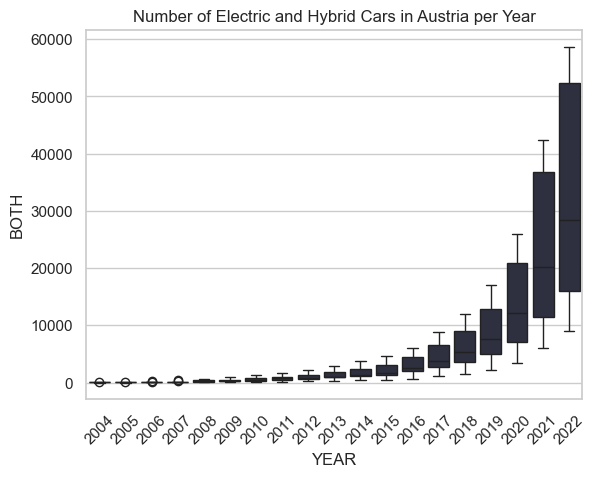

In [3]:
# E2:

## EDA for df_electro
df_electro['BOTH'] = df_electro['ELECTRICITY'] + df_electro['HYBRID']
sns.boxplot(data=df_electro, x='YEAR', y='BOTH')
plt.xticks(rotation=45);
plt.title('Number of Electric and Hybrid Cars in Austria per Year')


In [4]:
px.scatter(df_electro, x='ELECTRICITY', y='HYBRID',  trendline='ols', hover_data=[df_electro.index.get_level_values(0), df_electro.index.get_level_values(1)])


In [5]:
# is the number of electric cars correlated with the number of hybrid cars?
df_electro.corr()

,ELECTRICITY,HYBRID,BOTH
ELECTRICITY,1.000000,0.967194,0.986528
HYBRID,0.967194,1.000000,0.995723
BOTH,0.986528,0.995723,1.000000


<Axes: xlabel='YEAR', ylabel='ELECTRICITY_SHARE'>

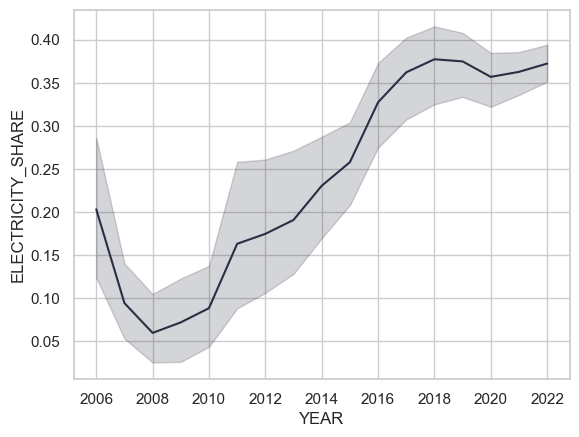

In [6]:
#share of fully electric per federal state
df_electro['ELECTRICITY_SHARE'] = df_electro['ELECTRICITY'] / (df_electro['ELECTRICITY'] + df_electro['HYBRID'])

#plot over time only from 2006 onwards
sns.lineplot(data=df_electro.loc[(slice(None), slice(2006, None)), :], x='YEAR', y='ELECTRICITY_SHARE')

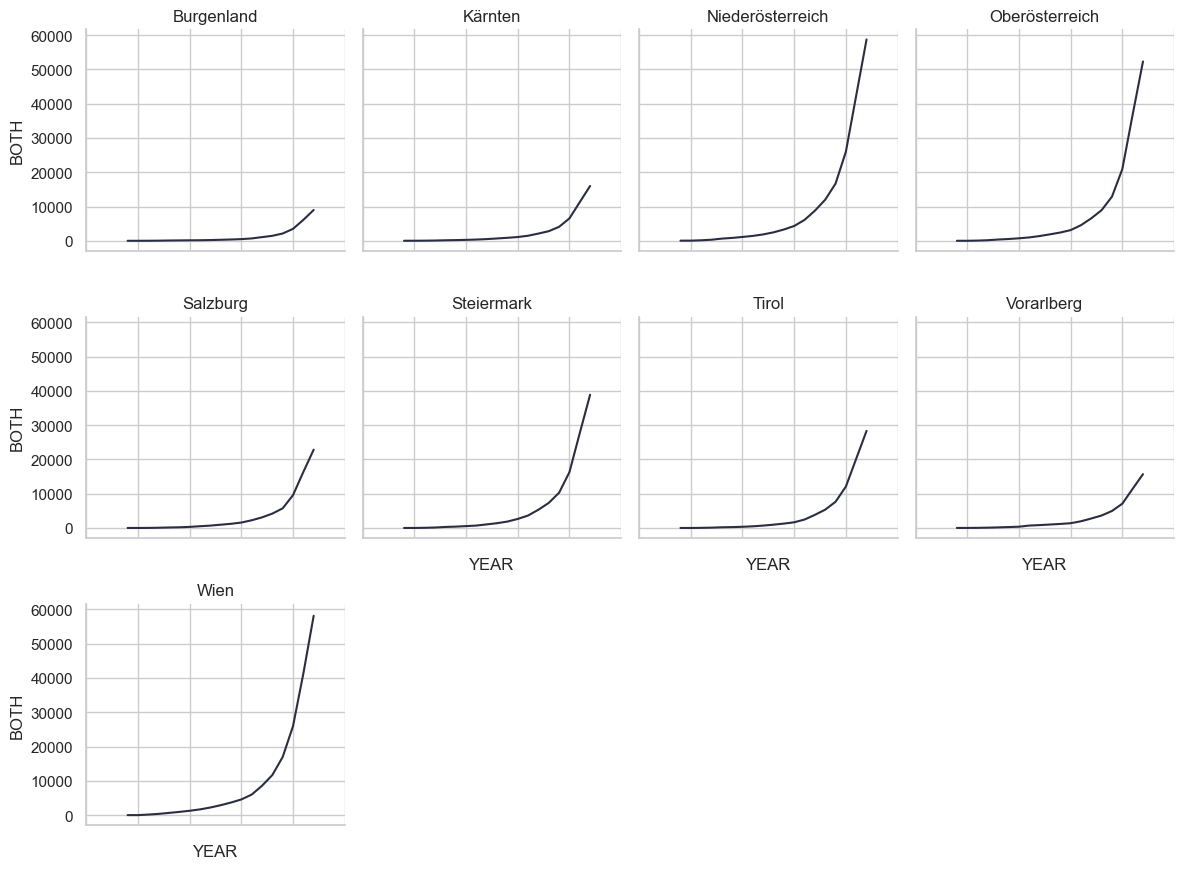

In [7]:
sns.FacetGrid(df_electro.reset_index(), col='FEDERAL_STATE', col_wrap=4).map(sns.lineplot, 'YEAR', 'BOTH').set_titles('{col_name}').set_xticklabels(rotation=45)

In [8]:
px.line(df_electro, x=df_electro.index.get_level_values(1), y='ELECTRICITY', title='Electric Cars in Austria 2004-2022', labels={'ELECTRICITY': 'Electric Cars', 'index': 'Year'}, color=df_electro.index.get_level_values(0))


## E3 - Formulate hypotheses

*Note: Read this section entirely and understand it - every group member.*

A hypothesis is an idea or explanation for something that is based on known facts but has not yet been proved. A hypothesis is a compact, concise statement, such as: "Individuals with higher income have (on average) more offspring.", that will be answered based on facts (the data). https://gradcoach.com/what-is-a-research-hypothesis-or-scientific-hypothesis/

Formulate *N* non-trivial hypotheses, 1 per group member, and regard the following criteria: 
- State the hypothesis explicitly in concise language. 
- The hypothesis must be **motivated** by either **EDA results** or **literature** (citation in the report needed).
- The hypothesis must refer to **endpoints** that are **testable**. Specifically, the endpoint must be derived from the data.
- Think of real-life use cases/consequences of your results (textual description). 
- For each hypothesis explain all executed steps. 
- In case of extreme or implausible results check the validity of your data.
- For each hypothesis export the artifacts (figures, tables, etc.) required for the report.
- If you decide to use a statistical test, use it properly. In particular, check the validity and comparability of the samples.

Do not:
- State nebulous, vague hypotheses. These don't contain endpoints and are unclear to test (i.e., answer).
- Use post-hoc hypotheses. Portraying an empirically inspired **post hoc hypothesis as a priori** violates the **falsification principle** crucial for hypothesis-driven (that is, confirmatory) empirical research. Falsification is severe scientific fraud.
- State trivial hypotheses (e.g., hypthesis 2: "Not Hypothesis 1").
- Answer based on "common knowledge".
- Try to **produce positively tested hypotheses**. If a well motivated hypothesis is negative, this is an important finding (see Simpson's Paradox). The value of a tested hypothesis lies in the information or learning it provides.

Example: The homework with Simpson's Paradox. The pooled overall comparison between the genders would be the EDA motivating the hypothesis: "At UC Berkeley the by-department admissions rate for females is lower than for males." It should be tested using samples of department admission rates for the 2 **groups** male and female. No steps of the test should be done in EDA (or a priory to stating the hypothesis). The groups should be compared graphically, e.g., via a stripplot overlayed with a boxplot. The figure should be labelled properly and exported for the report. A (paired) t-test **may** be used (it's optional) to test this hypothesis statistically. For different data (e.g., time series) different approaches may be required. You don't have to use statistical tests, in particular if you don't know what they are doing.


### E3-H1: The number of electric and hybrid vehicles in Austria is growing exponentially
Author: Samuel Oberhofer

Looking at the Boxplot above we see that the number of Electric and Hybrid Vehicles in Austria is growing rapidly. Visually it looks like the growth might even be exponential. 

To check this hypothesis we can try to fit an exponential curve to the data. The resulting $R^2$ value can tell us how well the curve fits.
According to our probabilistic methods Lecture, this does not necessarily mean the data follows an exponential distribution. 

To further check our hypothesis, we can look at the residuals. They should follow a normal distribution, which we can check using a Kolmogorov-Smirnov test. For this test we will use a significance level α = 0.05. If the p-value of our statistical test is above α, we can not reject the null-hypothesis, which states that the residues do not follow a normal distribution.

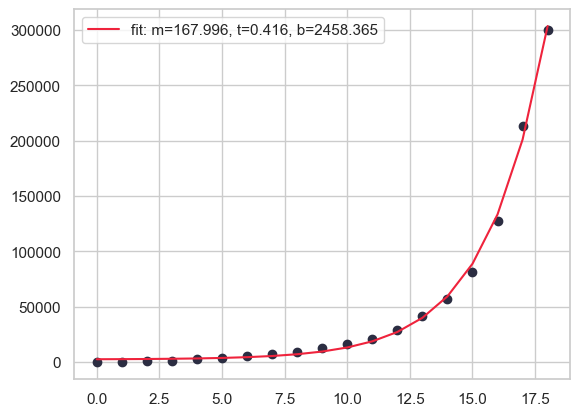

R² = 0.9973
Y = 167.996 * e^(0.416 * x) + 2458.365


In [13]:
# Sum over all federal states
df_electro['BOTH'] = df_electro['ELECTRICITY'] + df_electro['HYBRID']
sums = df_electro.groupby('YEAR')['BOTH'].sum()
sums.index = range(len(sums)) # change index to integers starting at 0
import numpy as np
# def quad(x,a,b,c):
#     return a*x**2 + b*x + c

# exponential function
def monoExp(x, m, t, b):
    return m * np.exp(t * x) + b
from scipy.optimize import curve_fit

x = sums.index
y = sums.values
p0=[1,1,1]# initial guess for the parameters
popt, pcov = curve_fit(monoExp, x, y, p0=p0)
plt.plot(x, monoExp(x, *popt), label='fit: m=%5.3f, t=%5.3f, b=%5.3f' % tuple(popt), color=accent_color)
plt.scatter(x, y, color=primary_color)

plt.legend()
plt.show()

# determine quality of the fit
residuals = y - monoExp(x, *popt)
squaredDiffs = np.square(y - monoExp(x,*popt))
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared:.4f}")
m,t,b = popt
print(f"Y = {m:.3f} * e^({t:.3f} * x) + {b:.3f}")

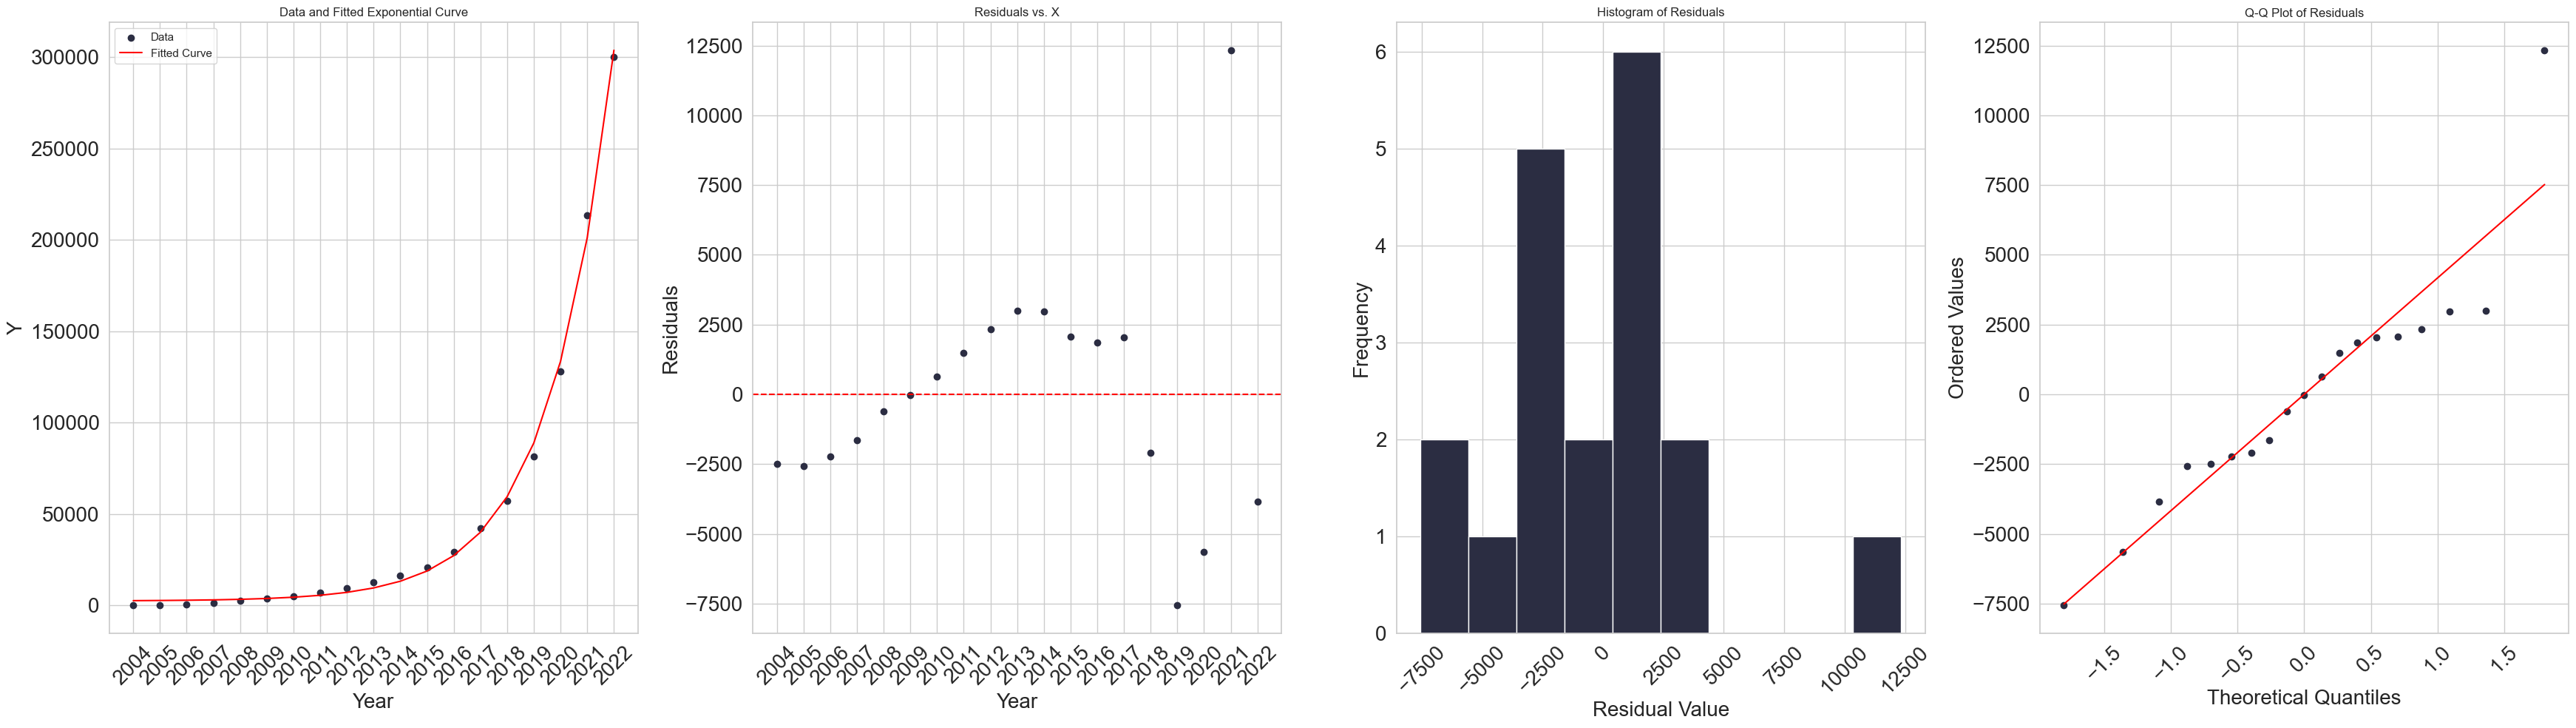

H₀: x values are exponentially distributed. Lilliefors test p-value: 0.3542
We cannot reject H₀ -> x values are exponentially distributed

H₀: residuals are normally distributed. Shapiro-Wilk test p-value: 0.0642
We cannot reject H₀ -> Residuals are normally distributed


In [27]:
x_plot = df_electro.index.get_level_values(1).unique()
fontsize = 20

# Perform residual analysis
plt.figure(figsize=(35, 10))

# Plot 1: Data and fitted curve
plt.subplot(1, 4, 1)
plt.scatter(np.asarray(x_plot).astype(str), y, label='Data')
plt.plot(np.asarray(x_plot).astype(str), monoExp(x, *popt), 'r-', label='Fitted Curve')
plt.xlabel('Year',fontsize=fontsize)
plt.ylabel('Y',fontsize=fontsize)
plt.legend()
plt.title('Data and Fitted Exponential Curve')
plt.xticks(rotation=45,fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Plot 2: Residuals vs. X
plt.subplot(1, 4, 2)
plt.scatter(np.asarray(x_plot).astype(str), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Year',fontsize=fontsize)
plt.ylabel('Residuals',fontsize=fontsize)
plt.title('Residuals vs. X')
plt.xticks(rotation=45,fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Plot 3: Histogram of residuals
plt.subplot(1, 4, 3)
plt.hist(residuals, bins=10)
plt.xlabel('Residual Value',fontsize=fontsize)
plt.ylabel('Frequency',fontsize=fontsize)
plt.title('Histogram of Residuals')
plt.xticks(rotation=45,fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Plot 4: Q-Q plot
plt.subplot(1, 4, 4)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
#set color of plot
plt.gca().get_lines()[0].set_color(primary_color)
plt.title('Q-Q Plot of Residuals')
plt.xticks(rotation=45,fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Theoretical Quantiles',fontsize=fontsize)
plt.ylabel('Ordered Values',fontsize=fontsize)

plt.tight_layout()
plt.savefig('analysis.png', dpi=300)
plt.show()

# Lilliefors test to check if x values are exponentially distributed
import statsmodels.api as sm
_, p_value = sm.stats.lilliefors(x, dist='exp')
print(f"H₀: x values are exponentially distributed. Lilliefors test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("We reject H₀ -> x values are not exponentially distributed")
else:
    print("We cannot reject H₀ -> x values are exponentially distributed")

# Additionally perform Shapiro-Wilk test for normality of residuals
_, p_value = stats.shapiro(residuals)
print(f"\nH₀: residuals are normally distributed. Shapiro-Wilk test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("We reject H₀ -> Residuals are not normally distributed")
else:
    print("We cannot reject H₀ -> Residuals are normally distributed")


Prediction for electric and hybrid Vehicles in Austria in 2023: 459303


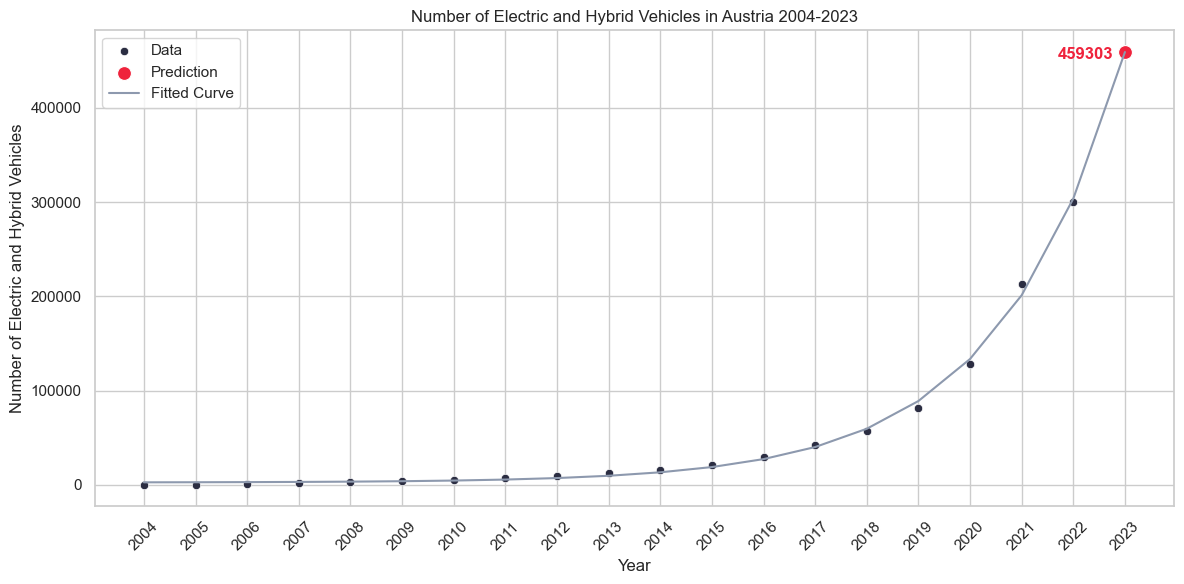

In [11]:
prediction_2023 = int(monoExp(x.max()+1, *popt))
print(f"Prediction for electric and hybrid Vehicles in Austria in 2023: {prediction_2023:.0f}")
x_plot = np.append(x_plot, 2023)
x = np.append(x, x.max()+1)
y = np.append(y, prediction_2023)


# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=np.asarray(x_plot).astype(str), y=y, color=primary_color)

# different color for latest data point, with value shown in plot
sns.scatterplot(x=["2023"], y=[prediction_2023], color=accent_color, s=100)
plt.text(x=17.7, y=prediction_2023-7000, s= int(prediction_2023), weight="bold", color=accent_color)

sns.lineplot(x=np.asarray(x_plot).astype(str), y=monoExp(x, *popt), color=secondary_color)
plt.legend(['Data', 'Prediction', 'Fitted Curve'])
plt.xlabel('Year')
plt.ylabel('Number of Electric and Hybrid Vehicles')
plt.title('Number of Electric and Hybrid Vehicles in Austria 2004-2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('prediction.png', dpi=300)

### E3-H2: "xxx"
Author: Group member 2



### E3-H3: "xxx"
Author: Group member 3


### E3-H4: "xxx"
Author: Group member 4


### E3-H5: "xxx"
Author: Group member 5
